In [1]:
from docplex.mp.model import Model
from docplex.util.environment import get_environment
from collections import namedtuple
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
HeatDemand=18293049.464999985
ElecDemand=9500242.261592042
Data_frames={}
SelfSuff=pd.DataFrame(index=range(1,6),columns=['Building','Neigh','Community','District','Village'])

In [39]:
#Building level cost
inde='Building'
objective=1
nodes='Cost'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
Data_frames[inde]=pd.DataFrame(index=range(1,6),columns=['Electricity','Natural gas','Oil','HP','PV','ST'])
NGOut=pd.read_csv(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Gas_boiler_out_Cost.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecIn=pd.read_csv(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Elec_in_Cost.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
OilOut=pd.read_csv(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Oil_boiler_out_Cost.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)

STout=pd.read_csv(root+inde+'/'+'ST_out_Cost.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+'PV_out_Cost.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/Elec_out_Cost.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+'GSHP_out._Cost.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+'ASHP_in_Cost.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+'GSHP_in_Cost.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+'ASHP_in_Cost.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'HP']=0
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=0
#Data_frames[inde].loc[objective,'PEMFC']=0#??????
SelfSuff.loc[objective,'Building']=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

91351.63298689947

In [40]:
#Node25 cost include elec when you get home!!!!!!!!!!!!!!!!!!READ
#Building level cost
inde='Building'
objective=2
nodes='Node25'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Building/Node25new_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_backcalc_elecin.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

176794.16912063956

In [41]:
#Node50 cost
#Building level cost
inde='Building'
objective=3
nodes='Node50new'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra-HeatDump.sum().sum()
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
Total=ElecIn.sum().sum()+NGOut.sum().sum()+OilOut.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum())
Total

28098411.637392677

In [42]:
(HeatDemand+ElecDemand)

27793291.726592027

In [43]:
inde='Building'
objective=4
nodes='Node75'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)

Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)

In [44]:
inde='Building'
objective=5
nodes='Node99'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'HP']

11405426.537540494

In [47]:
#Data_frames['Building']=Data_frames['Building']/1E6
Data_frames['Building'].loc[2,'ST']=0

Text(0,0.5,'Energy Demand (GWh)')

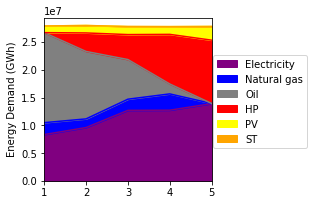

In [48]:
ax=Data_frames['Building'].plot(kind='area',color=['purple','blue','grey','red','yellow','orange'],figsize=(3,3))
ax.legend(loc=[1.01,0.2])
ax.set_xticks([1,2,3,4,5])
ax.set_ylabel('Energy Demand (GWh)')
#ax.title('Individual buildings')

In [49]:
Data_frames['Neigh']=pd.DataFrame(index=range(1,6),columns=['Electricity','Natural gas','Oil','HP','PV','ST'])

In [50]:
inde='Neigh'
objective=1
nodes='NCost'
Nheat=18229982
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
DHPump=pd.read_csv(root+inde+'/'+nodes+'_DHPump.csv')
DHPump.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()-extra
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

511193.0314701535

In [10]:
Data_frames[inde].sum(axis=1)

1    2.779329e+07
2             NaN
3             NaN
4             NaN
5             NaN
dtype: float64

In [51]:
inde='Neigh'
objective=2
nodes='NNode25'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

631592.0626447126

In [52]:
inde='Neigh'
objective=3
nodes='NNode50'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
Data_frames[inde]

,Electricity,Natural gas,Oil,HP,PV,ST
1,8.30347e+06,0,1.77675e+07,7202.65,1.71516e+06,5.32286e-14
2,9.50258e+06,1.85002e-10,1.38647e+07,2.5371e+06,1.88894e+06,-9.3568e-13
3,1.10919e+07,400667,8.99087e+06,5.40006e+06,1.90982e+06,-4.12353e-11
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
extra

787738.8738458753

In [53]:
inde='Neigh'
objective=4
nodes='NNode75'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+((GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum()))+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

995841.3921275213

In [54]:
inde='Neigh'
objective=5
nodes='NNode995'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

1654061.073425185

In [59]:
Data_frames['Neigh']

,Electricity,Natural gas,Oil,HP,PV,ST
1,8.30347e+06,0,1.77675e+07,7202.65,1.71516e+06,5.32286e-14
2,9.50258e+06,1.85002e-10,1.38647e+07,2.5371e+06,1.88894e+06,0
3,1.10919e+07,400667,8.99087e+06,5.40006e+06,1.90982e+06,0
4,1.30888e+07,201619,4.47477e+06,8.1028e+06,1.92525e+06,0
5,1.47223e+07,28703.9,42607.6,1.05054e+07,2.48409e+06,10170.6


In [60]:
Data_frames['Community']=pd.DataFrame(index=range(1,6),columns=['Electricity','Natural gas','Oil','HP','PV','ST'])

In [61]:
inde='Community'
objective=1
nodes='CCost'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()-extra
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

-1.0158320327504507e-13

In [62]:
inde='Community'
objective=2
nodes='CNode25'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

775337.0610589124

In [63]:
inde='Community'
objective=3
nodes='CNode50'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

1.312198200938249e-13

In [64]:
inde='Community'
objective=4
nodes='CNode75'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

-2.9401843500899823e-12

In [65]:
inde='Community'
objective=5
nodes='CNode995'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-(extra/2)
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()-(extra/2)
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

815996.1370280429

In [67]:
Data_frames['Community'].loc[3,'ST']=0

In [68]:
Data_frames['District']=pd.DataFrame(index=range(1,6),columns=['Electricity','Natural gas','Oil','HP','PV','ST'])

In [69]:
inde='District'
objective=1
nodes='DCost'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()-extra
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
extra

800989.7448964231

In [70]:
inde='District'
objective=2
nodes='DNode25'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

1.6899656606273978e-12

In [71]:
inde='District'
objective=3
nodes='DNode50'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

-2.1066833931849385e-12

In [72]:
inde='District'
objective=4
nodes='DNode75'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

2.6429981217427783e-10

In [73]:
inde='District'
objective=5
nodes='DNode995'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

2234647.192655094

In [78]:
Data_frames['District']

,Electricity,Natural gas,Oil,HP,PV,ST
1,8.17664e+06,0,1.77644e+07,0,1.85223e+06,2.13423e-13
2,9.20556e+06,0,1.51059e+07,1.61918e+06,1.86265e+06,0
3,1.04377e+07,0,1.15787e+07,3.90853e+06,1.8684e+06,2.10668e-12
4,1.16325e+07,3.88483e+06,4.86648e+06,5.30009e+06,1.7829e+06,326503
5,1.27875e+07,5.62977e+06,0,1.71142e+06,82025.1,7.58253e+06


In [79]:
Data_frames['Village']=pd.DataFrame(index=range(1,6),columns=['Electricity','Natural gas','Oil','HP','PV','ST'])

In [80]:
inde='Village'
objective=1
nodes='VCost'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()-extra
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

7.442935157087041e-13

In [81]:
inde='Village'
objective=2
nodes='VNode25'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()-extra/2
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra/2
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

6.078970660183812e-12

In [82]:
inde='Village'
objective=3
nodes='VNode50'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)

Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()-extra/2
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra/2
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

1.467529837191531e-09

In [83]:
inde='Village'
objective=4
nodes='VNode75'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())-extra/2
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()-extra/2
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

7.598390960244398e-10

In [84]:
inde='Village'
objective=5
nodes='VNode99'
root=r'/Users/portia_murray/Dropbox/PhD/ICAE data/'
NGOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut0.csv')
NGOut.drop(['Unnamed: 0'], axis=1,inplace=True)
STout=pd.read_csv(root+inde+'/'+nodes+'_ROut1.csv')
STout.drop(['Unnamed: 0'], axis=1,inplace=True)
PVout=pd.read_csv(root+inde+'/'+nodes+'_ROut0.csv')
PVout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut0.csv')
GSHPout.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPout=pd.read_csv(root+inde+'/'+nodes+'_HPOut1.csv')
ASHPout.drop(['Unnamed: 0'], axis=1,inplace=True)

GSHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn0.csv')
GSHPin.drop(['Unnamed: 0'], axis=1,inplace=True)
ASHPin=pd.read_csv(root+inde+'/'+nodes+'_HPIn1.csv')
ASHPin.drop(['Unnamed: 0'], axis=1,inplace=True)

ElecOut=pd.read_csv(root+inde+'/'+nodes+'_ElecOut.csv')
ElecOut.drop(['Unnamed: 0'], axis=1,inplace=True)

HeatDump=pd.read_csv(root+inde+'/'+nodes+'_HeatDump.csv')
HeatDump.drop(['Unnamed: 0'], axis=1,inplace=True)
ElecIn=pd.read_csv(root+inde+'/'+nodes+'_ElecIn.csv')
ElecIn.drop(['Unnamed: 0'], axis=1,inplace=True)
OilOut=pd.read_csv(root+inde+'/'+nodes+'_BoilOut1.csv')
OilOut.drop(['Unnamed: 0'], axis=1,inplace=True)
extra=(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()+(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())+(PVout.sum().sum()-ElecOut.sum().sum())+(STout.sum().sum()-HeatDump.sum().sum()))-(HeatDemand+ElecDemand)
Data_frames[inde].loc[objective,'Natural gas']=NGOut.sum().sum()
Data_frames[inde].loc[objective,'Oil']=OilOut.sum().sum()
Data_frames[inde].loc[objective,'Electricity']=ElecIn.sum().sum()
Data_frames[inde].loc[objective,'HP']=(GSHPout.sum().sum()-GSHPin.sum().sum())+(ASHPout.sum().sum()-ASHPin.sum().sum())
Data_frames[inde].loc[objective,'PV']=PVout.sum().sum()-ElecOut.sum().sum()
Data_frames[inde].loc[objective,'ST']=STout.sum().sum()-HeatDump.sum().sum()-extra
SelfSuff.loc[objective,inde]=((HeatDemand+ElecDemand)-(NGOut.sum().sum()+OilOut.sum().sum()+ElecIn.sum().sum()))/(HeatDemand+ElecDemand)
HeatDump.sum().sum()

2468880.261130153

In [88]:
Data_frames['Village'].loc[3,'ST']=0

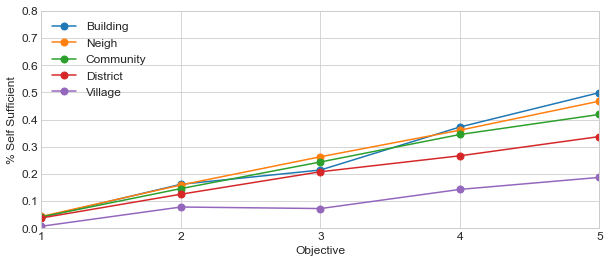

In [90]:
plt.style.use('seaborn-whitegrid')
ax=SelfSuff.plot(kind='line',marker='.',markersize=14,fontsize=12,figsize=(10,4))
ax.set_xlabel('Objective',fontsize=12)
ax.set_ylabel('% Self Sufficient',fontsize=12)
ax.set_ylim(0,0.8)
plt.legend(fontsize=12)
ax.xaxis.set_ticks([1,2,3,4,5])
plt.savefig(r'/Users/portia_murray/Dropbox/PhD/ICAE data/Pselfsuff.png',bbox_inches='tight',dpi=300)

In [91]:
Data_frames['Community']#.loc[1,'NG']=0

,Electricity,Natural gas,Oil,HP,PV,ST
1,8.18313,0,17.7543,0.01089,1.845,1.01583e-19
2,9.44625,2.98652e-15,14.291,2.19723,1.85881,5.531e-19
3,10.9692,0,10.0469,4.90949,1.86765,0
4,12.3589,0,5.84727,7.38763,2.19952,2.94018e-18
5,14.2719,1.88295,0,5.99171,0.707094,4.93964


In [90]:
Data_frames['District']=Data_frames['District']/1E6

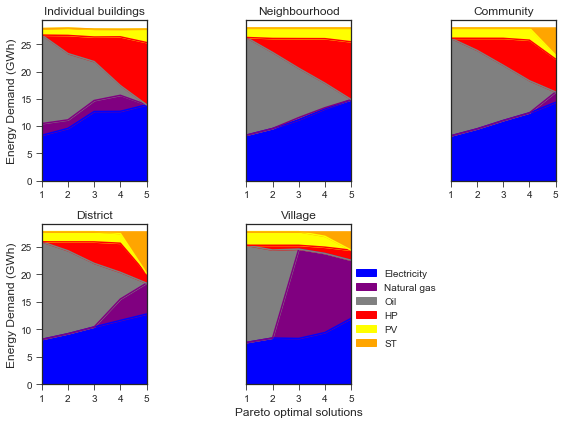

In [102]:
plt.style.use('seaborn-ticks')
fig = plt.figure(figsize=(8,6))
clr=['blue','purple','grey','red','yellow','orange']
ax = fig.add_subplot(2, 3, 1)
ax=Data_frames['Building'].plot(kind='area',color=clr,ax=ax,legend=None)
ax.set_xticks([1,2,3,4,5])
ax.set_ylabel('Energy Demand (GWh)',fontsize=12)
ax.set_title('Individual buildings')
#ax.title('Individual buildings')

ax = fig.add_subplot(2, 3, 2)
ax=Data_frames['Neigh'].plot(kind='area',color=clr,ax=ax,legend=None)
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_visible(False)
ax.set_title('Neighbourhood')
#ax.set_ylabel('Energy Demand (GWh)')
#ax.title('Individual buildings')

ax = fig.add_subplot(2, 3, 3)
ax=Data_frames['Community'].plot(kind='area',color=clr,ax=ax,legend=None)
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_visible(False)
ax.set_title('Community')
#ax.set_xlabel('Pareto optimal solutions',fontsize=12)
#ax.set_ylabel('Energy Demand (GWh)')
#ax.title('Individual buildings')

ax = fig.add_subplot(2, 3, 4)
ax=Data_frames['District'].plot(kind='area',color=clr,ax=ax,legend=None)
ax.set_xticks([1,2,3,4,5])
#ax.yaxis.set_visible(False)
ax.set_title('District')
ax.set_ylabel('Energy Demand (GWh)',fontsize=12)

#ax.set_ylabel('Energy Demand (GWh)')
#ax.title('Individual buildings')

ax = fig.add_subplot(2, 3, 5)
ax=Data_frames['Village'].plot(kind='area',color=clr,ax=ax)
ax.legend(loc=[1.01,0.2])
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_visible(False)
ax.set_title('Village')
#ax.set_ylabel('Energy Demand (GWh)')
#ax.title('Individual buildings')
ax.set_xlabel('Pareto optimal solutions',fontsize=12)
plt.tight_layout()
plt.savefig(r'/Users/portia_murray/Dropbox/PhD/ICAE data/selfself.png',bbox_inches='tight',dpi=300)

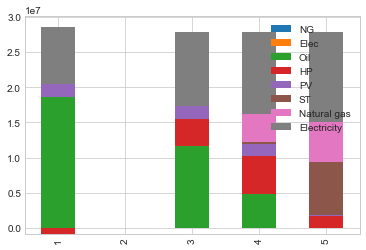

In [377]:
Data_frames['District'].plot(kind='bar',stacked=True)

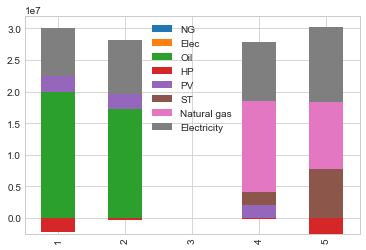

In [379]:
Data_frames['Village'].plot(kind='bar',stacked=True)

In [466]:
Data_frames['Building'].sum(axis=1)

1    2.668309e+07
2             NaN
3    2.779329e+07
4             NaN
5    2.779329e+07
dtype: float64